In [5]:
import pandas as pd

# Load the CSV file
file_path = (r"C:\Users\ASUS\Downloads\pPython ca2.csv")
df = pd.read_csv(file_path)

# Display basic info and first few rows to understand the data structure
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2148 non-null   float64
 1   Year_Birth           2150 non-null   float64
 2   Education            2152 non-null   object 
 3   Marital_Status       2151 non-null   object 
 4    Income              2130 non-null   float64
 5   Kidhome              2152 non-null   float64
 6   Teenhome             2152 non-null   float64
 7   Dt_Customer          2152 non-null   object 
 8   Recency              2152 non-null   float64
 9   MntWines             2152 non-null   float64
 10  MntFruits            2152 non-null   float64
 11  MntMeatProducts      2152 non-null   float64
 12  MntFishProducts      2152 non-null   float64
 13  MntSweetProducts     2152 non-null   float64
 14  MntGoldProds         2152 non-null   float64
 15  NumDealsPurchases    2152 non-null   f

(None,
         ID  Year_Birth   Education Marital_Status   Income   Kidhome  \
 0   1826.0      1970.0  Graduation       Divorced   84835.0      0.0   
 1      1.0      1961.0  Graduation         Single   57091.0      0.0   
 2  10476.0      1958.0  Graduation        Married   67267.0      0.0   
 3   1386.0      1967.0  Graduation       Together   32474.0      1.0   
 4   5371.0      1989.0  Graduation         Single   21474.0      1.0   
 
    Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
 0       0.0  16-06-2014      0.0     189.0  ...                6.0   
 1       0.0  15-06-2014      0.0     464.0  ...                7.0   
 2       1.0  13-05-2014      0.0     134.0  ...                5.0   
 3       1.0  11-05-2014      0.0      10.0  ...                2.0   
 4       0.0  08-04-2014      0.0       6.0  ...                2.0   
 
    NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
 0                1.0           0.0         

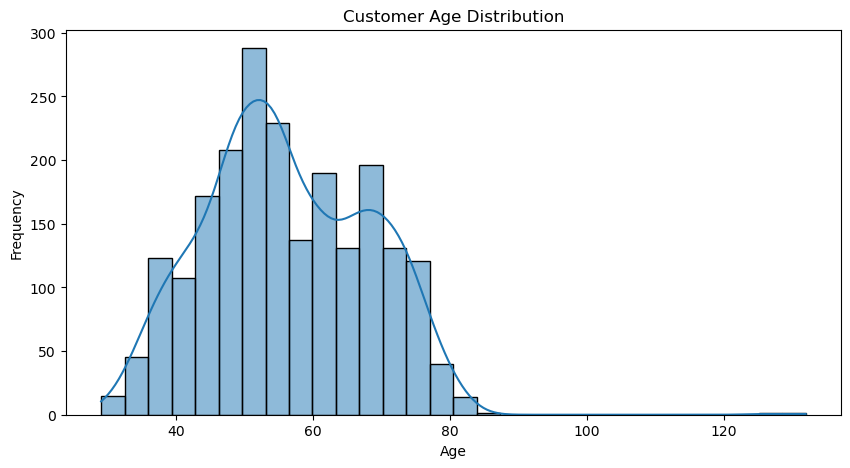

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Clean column names (strip spaces)
df.columns = df.columns.str.strip()

# Calculate Age
df['Age'] = datetime.now().year - df['Year_Birth']

# Demographics: Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

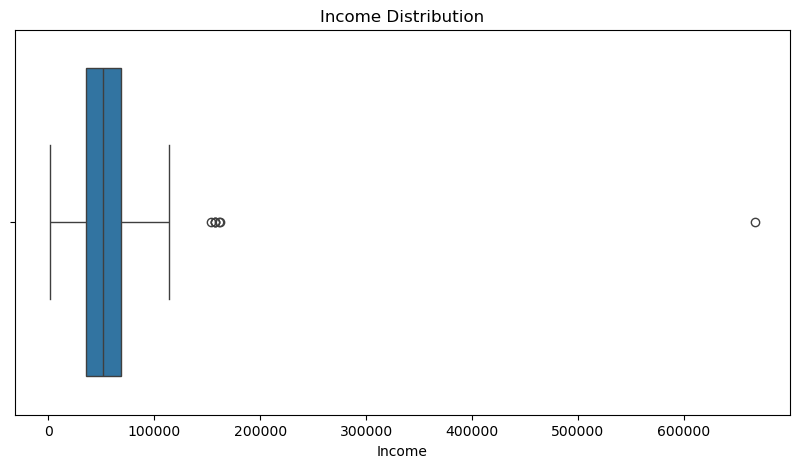

In [10]:
# Demographics: Income Distribution
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Income'].dropna())
plt.title("Income Distribution")
plt.xlabel("Income")
plt.show()


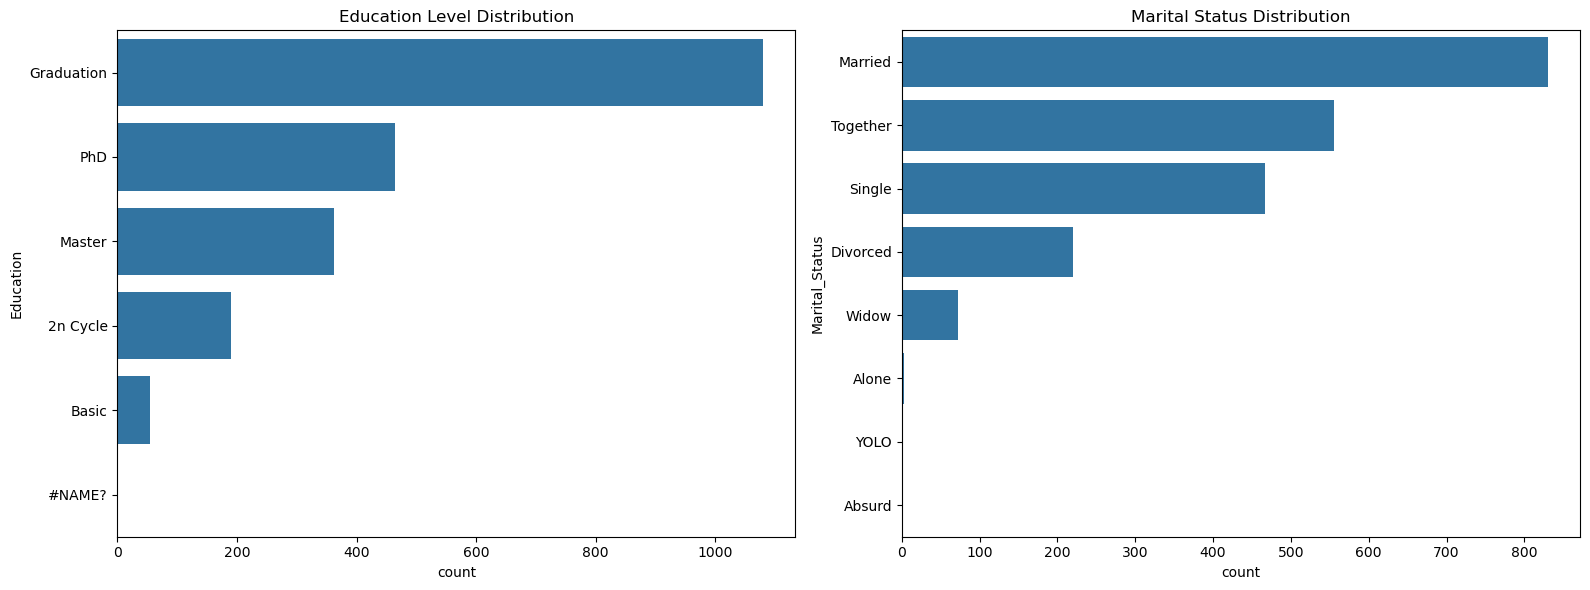

In [11]:
# Demographics: Education and Marital Status
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(ax=axes[0], y=df['Education'], order=df['Education'].value_counts().index)
axes[0].set_title("Education Level Distribution")

sns.countplot(ax=axes[1], y=df['Marital_Status'], order=df['Marital_Status'].value_counts().index)
axes[1].set_title("Marital Status Distribution")
plt.tight_layout()
plt.show()


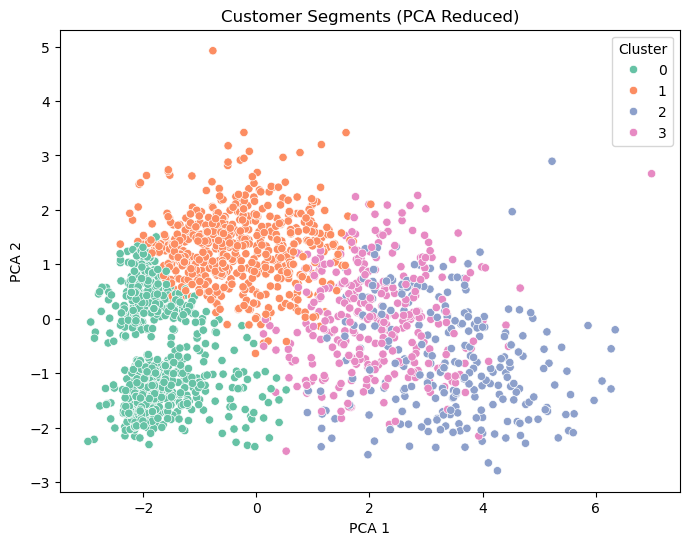

In [13]:

# Segmentation: KMeans clustering
features = ['Income', 'Kidhome', 'Teenhome', 'Age',
            'MntWines', 'MntFruits', 'MntMeatProducts', 
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

X = df[features].dropna()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title("Customer Segments (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


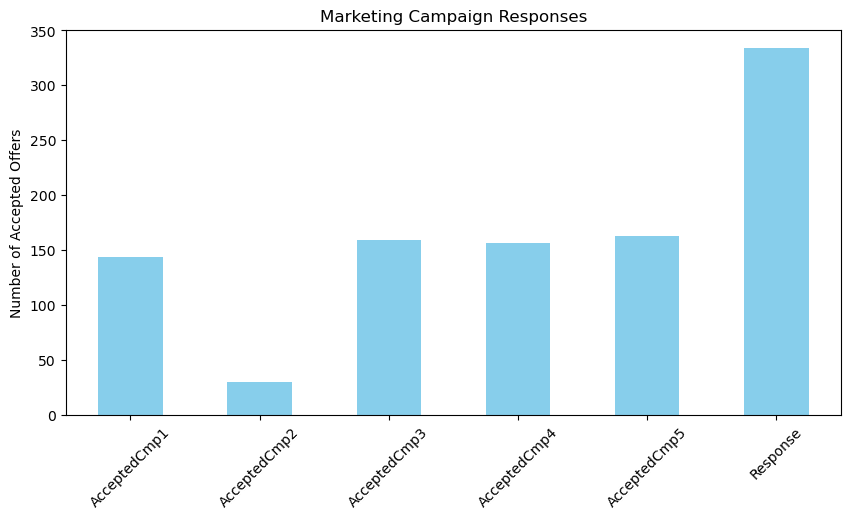

In [14]:
# Campaign Effectiveness
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df[campaigns].sum().plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title("Marketing Campaign Responses")
plt.ylabel("Number of Accepted Offers")
plt.xticks(rotation=45)
plt.show()


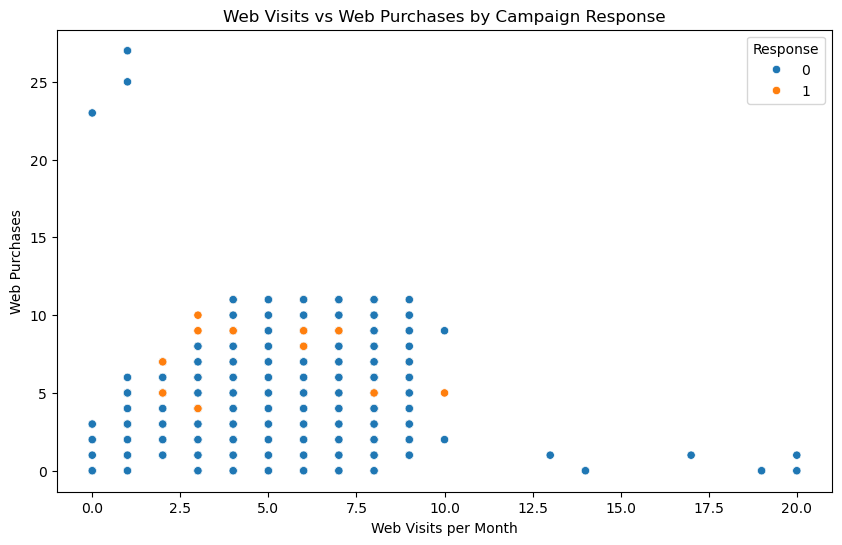

In [15]:
# Predict Behavior: Web Visits vs Purchases
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='NumWebVisitsMonth', y='NumWebPurchases', hue='Response')
plt.title("Web Visits vs Web Purchases by Campaign Response")
plt.xlabel("Web Visits per Month")
plt.ylabel("Web Purchases")
plt.show()


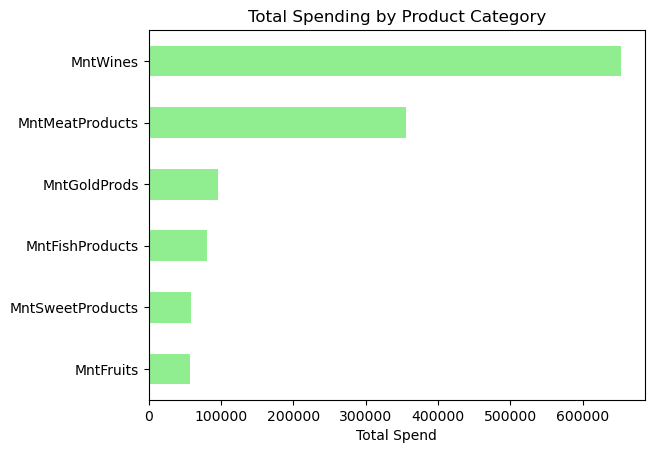

In [16]:
# Optimize Marketing Spend
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[spend_cols].sum().sort_values().plot(kind='barh', color='lightgreen')
plt.title("Total Spending by Product Category")
plt.xlabel("Total Spend")
plt.show()
